<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/SpecialTopicsML-Winter2022/blob/main/Sumanth_Mahabaleshwar_Bhat_Assignment_1_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
X_train = np.linspace(0.,1.,10) # training set
X_valid = np.linspace(0.,1.,100) # validation set
X_test = np.linspace(0.,1.,100)  # Test set
np.random.seed(1)
#print(X_train)
t_valid = np.sin(4*np.pi*X_valid) + 0.3 * np.random.randn(100)
t_train = np.sin(4*np.pi*X_train) + 0.3 * np.random.randn(10)
t_test = np.sin(4*np.pi*X_valid) + 0.3 * np.random.randn(100)
#print(t_train)
X_true = np.linspace(0.,1.,1000000)
t_true = np.sin(4*np.pi*X_true)
t_valid_true = np.sin(4*np.pi*X_valid)
t_train_true = np.sin(4*np.pi*X_train)
t_test_true = np.sin(4*np.pi*X_valid)

In [3]:
# Function to compute vector of parameters
def vectorParametersComputation(X,t):
    A = np.matmul(X.T,X)
    B = np.linalg.pinv(A)
    C = np.matmul(X.T,t)
    w = np.matmul(B,C)
    return w

# Function to compute errors
def errorComputation(Y, t, N):
    diff = np.subtract(Y, t)
    error = np.dot(diff.T, diff)/N
    RMSE_error = np.sqrt(error)
    return RMSE_error

In [4]:
vector_Parameters = []
X_train_input = ""
polynomial_Train_Pred = pd.DataFrame()
M = 10
for i in range(0, M):
    X_train_new = np.power(X_train, i).reshape(len(X_train), 1)
    if i == 0:
        X_train_input = X_train_new
    else:
        X_train_input = np.concatenate((X_train_input,X_train_new), axis = 1)

    w = vectorParametersComputation(X_train_input, t_train.reshape(len(X_train), 1))
    vector_Parameters.append(w)
    train_output = np.matmul(X_train_input, w)

    if(i == 0):
        polynomial_Train_Pred = train_output.reshape(len(X_train),1)
    else:
        polynomial_Train_Pred = np.concatenate((polynomial_Train_Pred , train_output.reshape(len(X_train),1)), axis=1)

polynomial_Train_Pred = pd.DataFrame(polynomial_Train_Pred)

# Error Calculation - Training
error_Train = []
print("For Training data")
for i in range(0, M):
    y_train = polynomial_Train_Pred.iloc[:,i]
    RMSE_train = errorComputation(y_train, t_train, len(t_train))
    print("M =", i," Training Error: ", RMSE_train)
    error_Train.append(RMSE_train)

For Training data
M = 0  Training Error:  0.816660969976422
M = 1  Training Error:  0.7789838978378575
M = 2  Training Error:  0.7789794000899992
M = 3  Training Error:  0.7789105551997759
M = 4  Training Error:  0.7768590465729194
M = 5  Training Error:  0.304112445081133
M = 6  Training Error:  0.3040333818482205
M = 7  Training Error:  0.1362952311378876
M = 8  Training Error:  0.061939191939998785
M = 9  Training Error:  8.625992773116995e-05


In [5]:
print("For Validation data")
polynomial_Valid_Pred = pd.DataFrame()
for i in range(0, M):
    X_valid_new = np.power(X_valid, i).reshape(len(X_valid), 1)

    if i == 0:
        X_valid_input = X_valid_new
    else:
        X_valid_input = np.concatenate((X_valid_input, X_valid_new), axis = 1)

    polynomail_valid = np.matmul(X_valid_input, vector_Parameters[i])

    if(i == 0):
        polynomial_Valid_Pred = polynomail_valid.reshape(len(X_valid),1)
    else:
        polynomial_Valid_Pred = np.concatenate((polynomial_Valid_Pred , polynomail_valid.reshape(len(X_valid),1)), axis=1)

polynomial_Valid_Pred = pd.DataFrame(polynomial_Valid_Pred)

# Error Calculation - Validation
error_Valid = []
for i in range(0, M):
    y_valid = polynomial_Valid_Pred.iloc[:,i]
    RMSE_valid = errorComputation(y_valid, t_valid, len(t_valid))
    print("M =", i," Validation Error: ", RMSE_valid)
    error_Valid.append(RMSE_valid)

For Validation data
M = 0  Validation Error:  0.7587903008757801
M = 1  Validation Error:  0.7197359258044828
M = 2  Validation Error:  0.7196777311926025
M = 3  Validation Error:  0.7226494227383822
M = 4  Validation Error:  0.7260987829422623
M = 5  Validation Error:  0.43961854158680325
M = 6  Validation Error:  0.4394976586569084
M = 7  Validation Error:  0.33219640809391293
M = 8  Validation Error:  0.46989261386119685
M = 9  Validation Error:  0.5782307067796147


In [6]:
print("For Test data")
X_test_input = ""
polynomial_Test_Pred = pd.DataFrame()
for i in range(0, M):
    X_test_new = np.power(X_test, i).reshape(len(X_test), 1)

    if i == 0:
        X_test_input = X_test_new
    else:
        X_test_input = np.concatenate((X_test_input, X_test_new), axis = 1)

    polynomail_test = np.matmul(X_test_input, vector_Parameters[i])

    if(i == 0):
        polynomial_Test_Pred = polynomail_test.reshape(len(X_test),1)
    else:
        polynomial_Test_Pred = np.concatenate((polynomial_Test_Pred , polynomail_test.reshape(len(X_test),1)), axis=1)

polynomial_Test_Pred = pd.DataFrame(polynomial_Test_Pred)

# Error Calculation - Validation
error_Test = []
for i in range(0, M):
    y_test = polynomial_Test_Pred.iloc[:,i]
    RMSE_test = errorComputation(y_test, t_test, len(t_test))
    print("M =", i," Test Error: ", RMSE_test)
    error_Test.append(RMSE_test)

For Test data
M = 0  Test Error:  0.7598641762863054
M = 1  Test Error:  0.7164044475256184
M = 2  Test Error:  0.7162932081740518
M = 3  Test Error:  0.7191455257974311
M = 4  Test Error:  0.7187898120184213
M = 5  Test Error:  0.4219012157608195
M = 6  Test Error:  0.42242537688900794
M = 7  Test Error:  0.37461256490523953
M = 8  Test Error:  0.5169011973913942
M = 9  Test Error:  0.5833714081324628


In [7]:
def plot_training_validation_prediction():
    for i in range(0, M):
        plt.figure()
        plt.scatter(X_train, t_train, color = 'magenta', label = 'training example')
        plt.scatter(X_valid, t_valid, color = 'blue', label = 'validation example')
        plt.plot(X_train, polynomial_Train_Pred.iloc[:,i], color = 'red', label = 'training prediction')
        plt.plot(X_valid, polynomial_Valid_Pred.iloc[:,i], color = 'green', label = 'validation prediction')
        plt.legend(loc ="lower right")
        plt.title('For M = %i' %i)
        plt.xlabel("Features")
        plt.ylabel("Target")
        plt.show()

In [8]:
def true_vs_prediction_function_plot(x, t, prediction_function):
    for i in range(0, M):
        plt.figure()
        plt.scatter(x, t,color='red')
        plt.plot(x, prediction_function, color='blue', label = 'prediction')
        plt.plot(X_true, t_true, color='green', label = 'true function')
        plt.legend(loc ="lower right")
        plt.title('Plot of True function vs Prediction Function when M = %i' %i)
        plt.show()

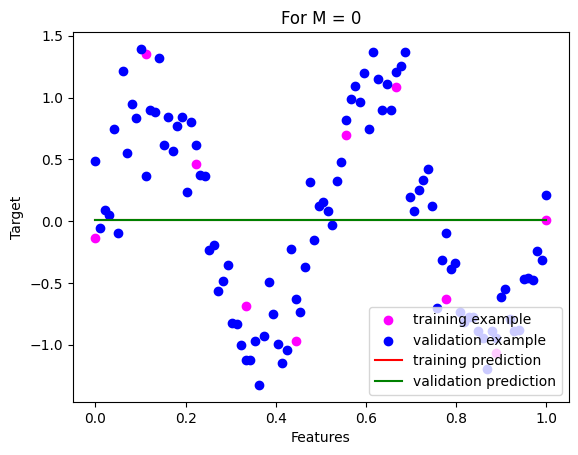

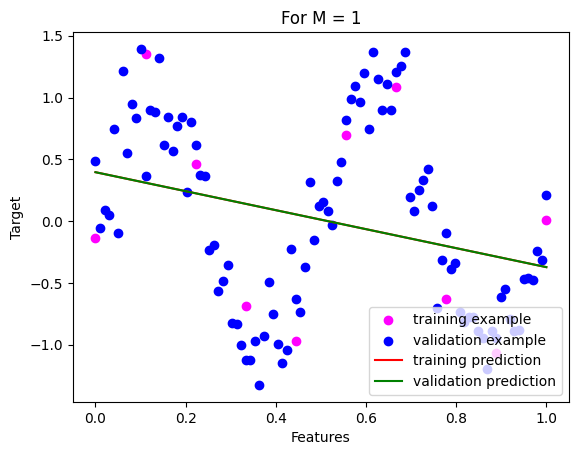

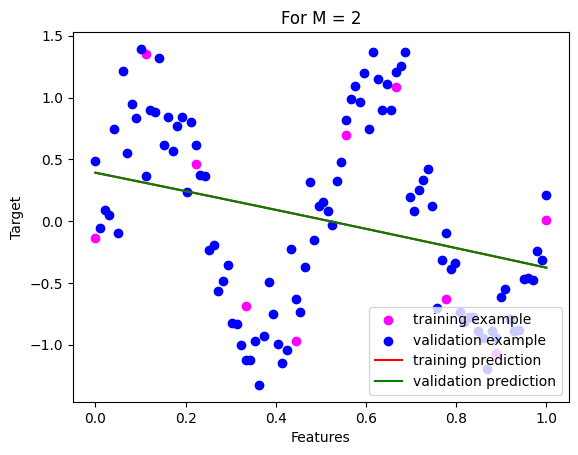

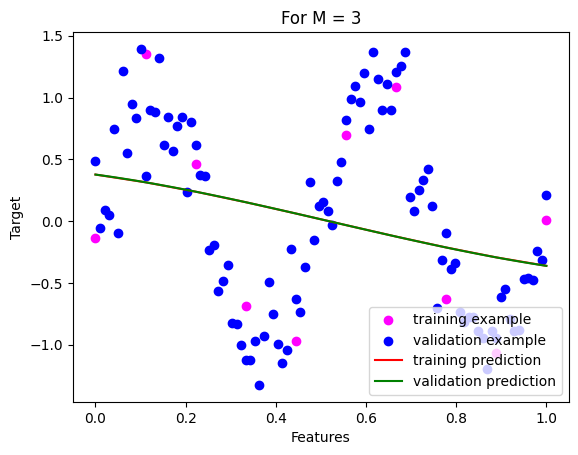

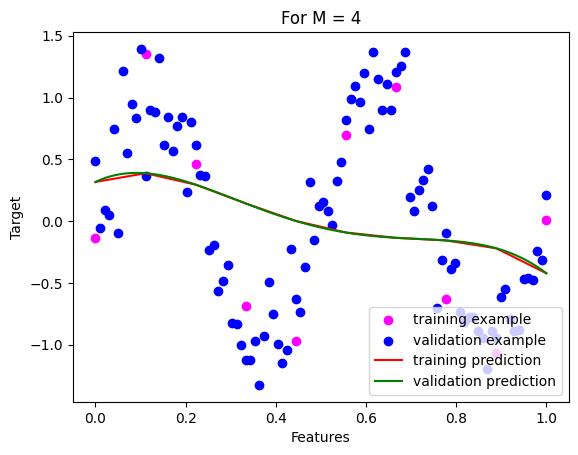

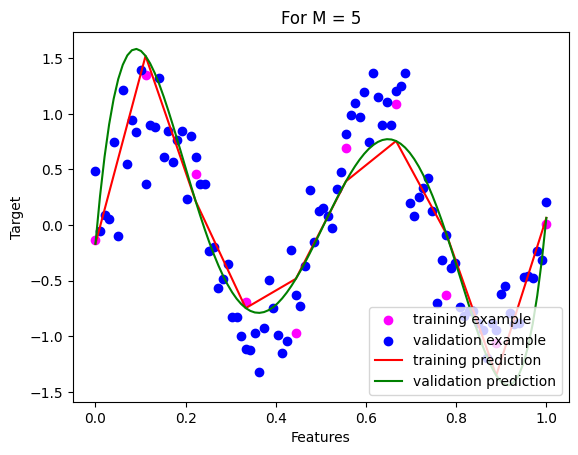

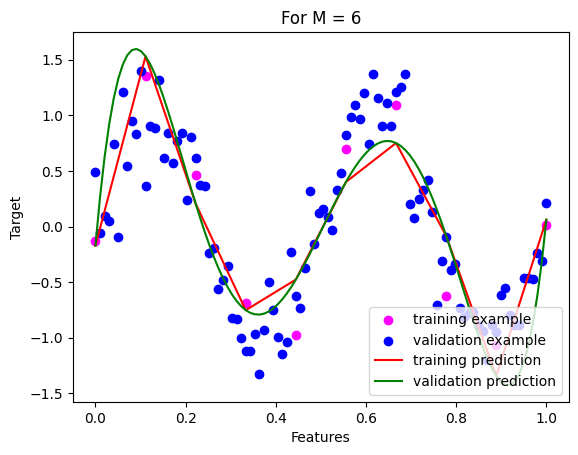

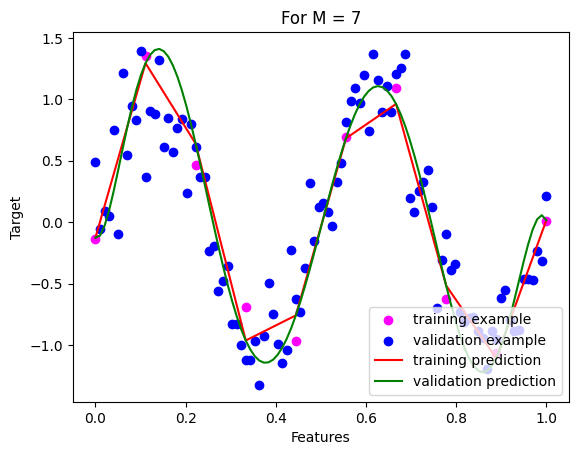

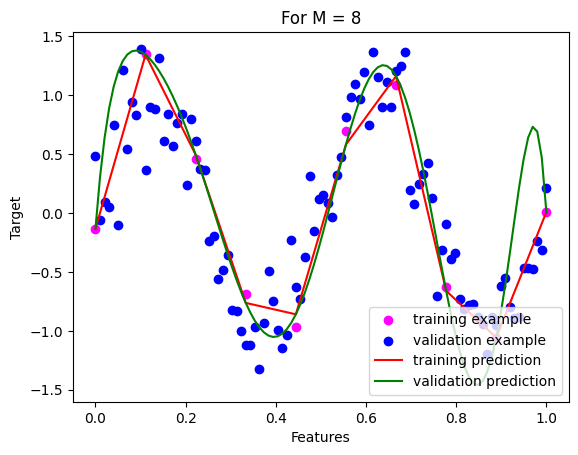

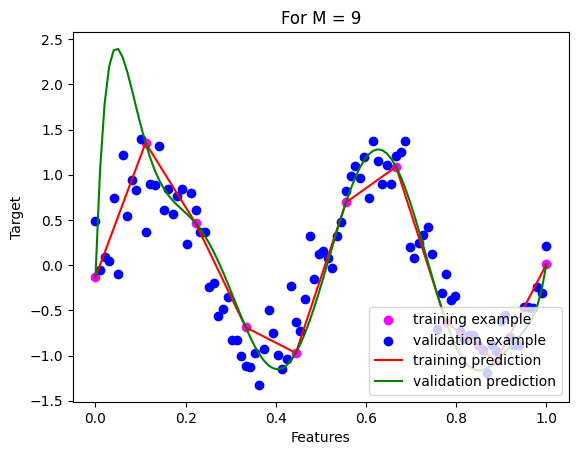

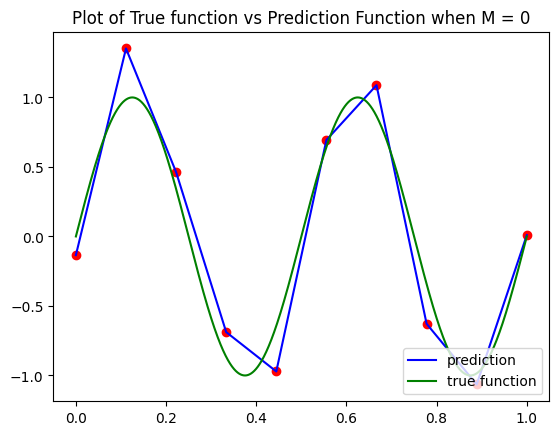

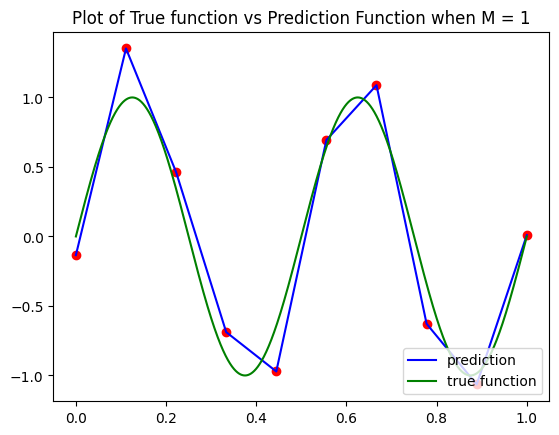

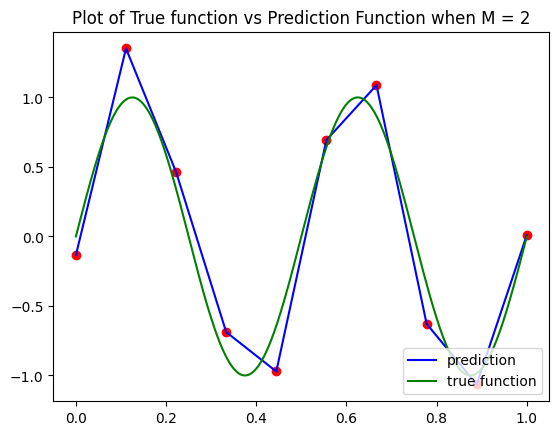

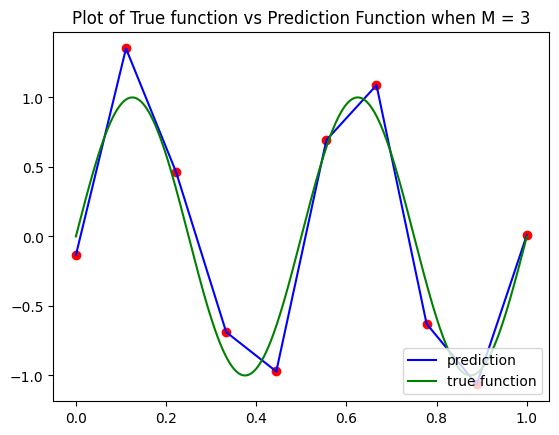

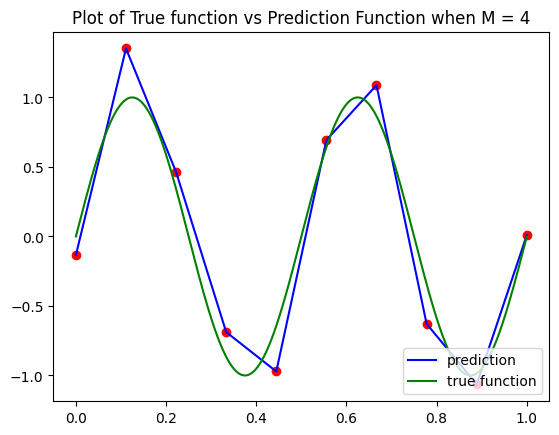

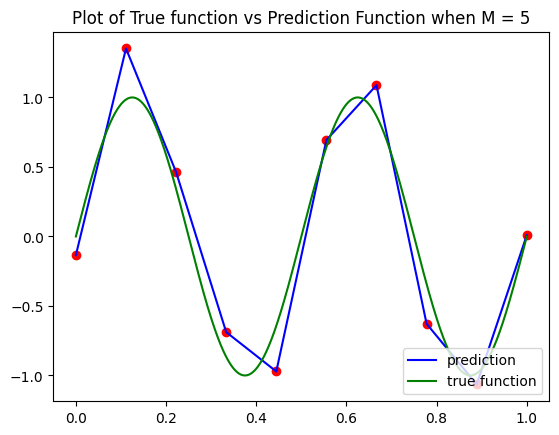

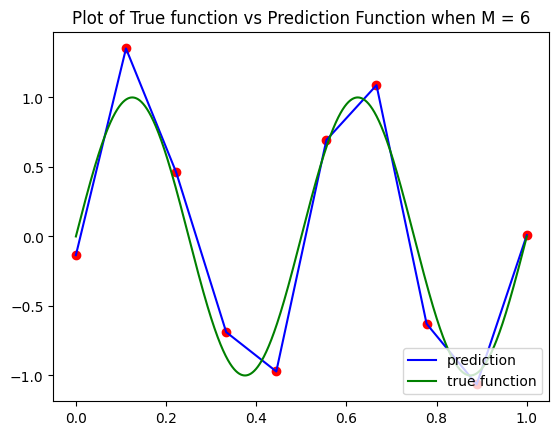

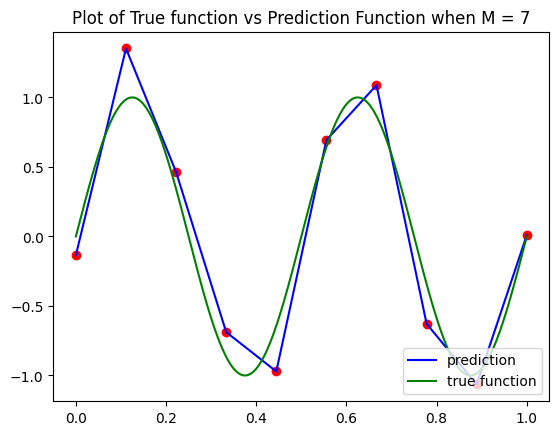

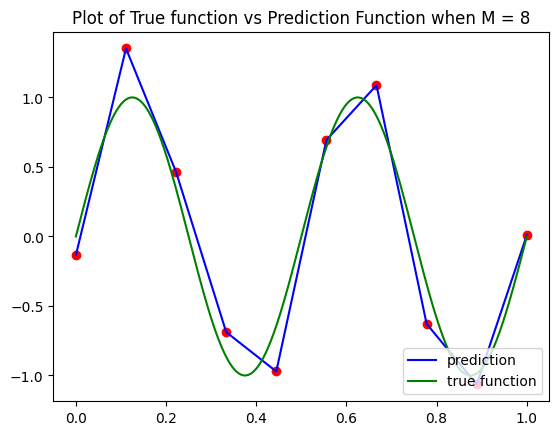

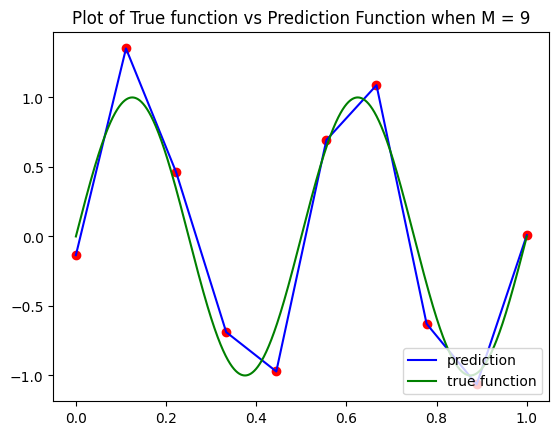

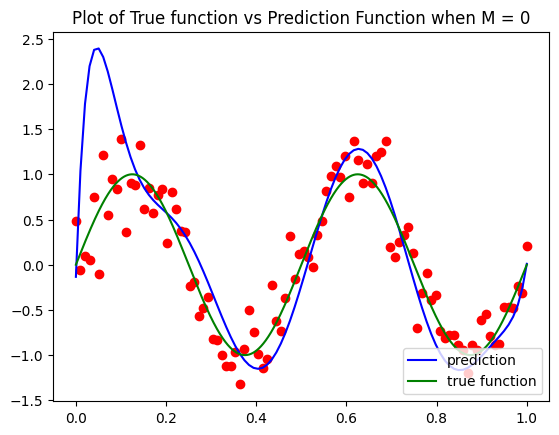

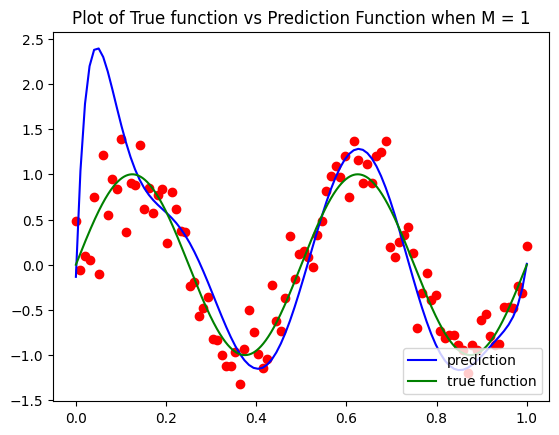

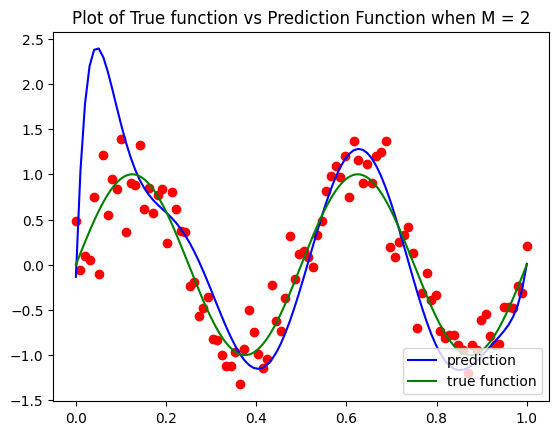

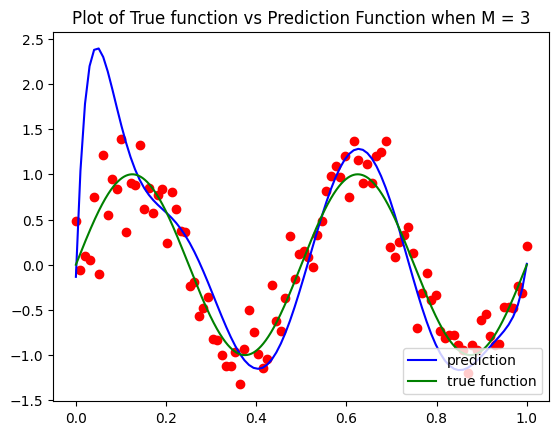

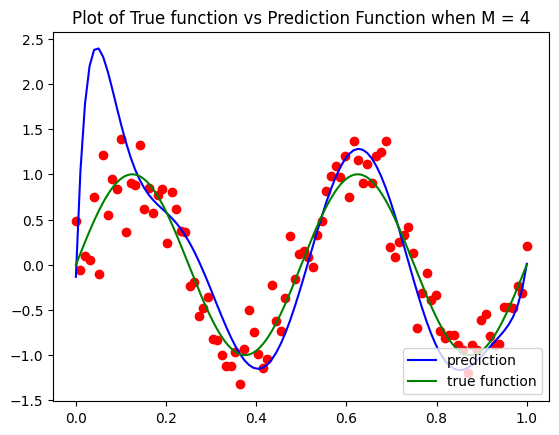

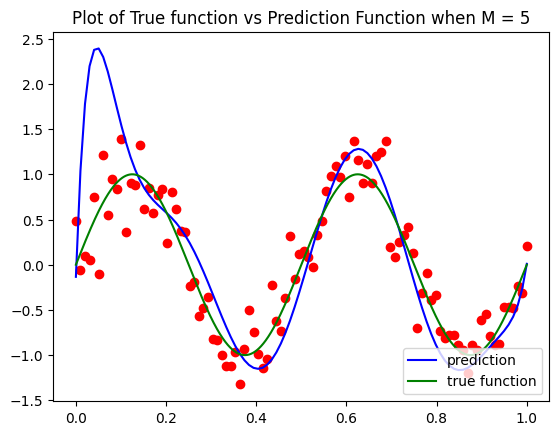

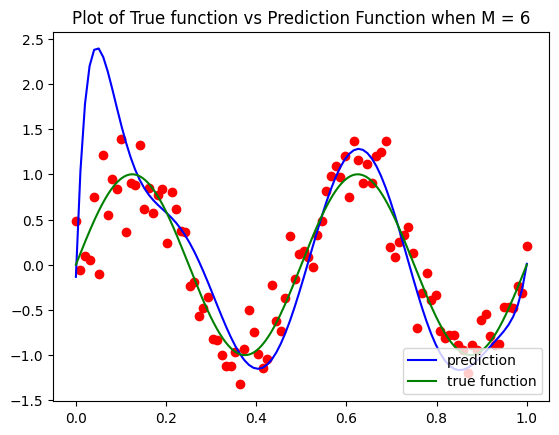

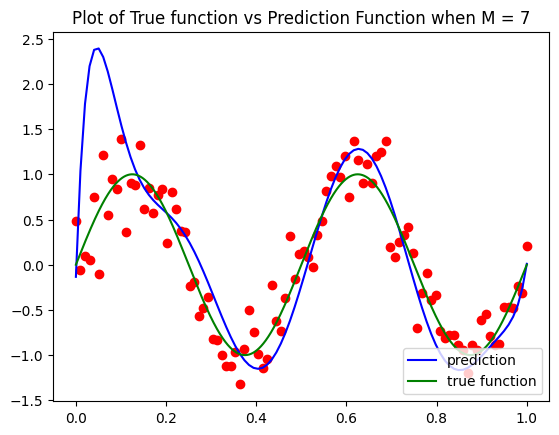

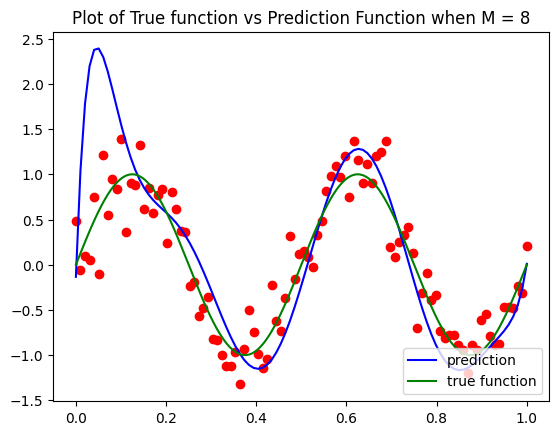

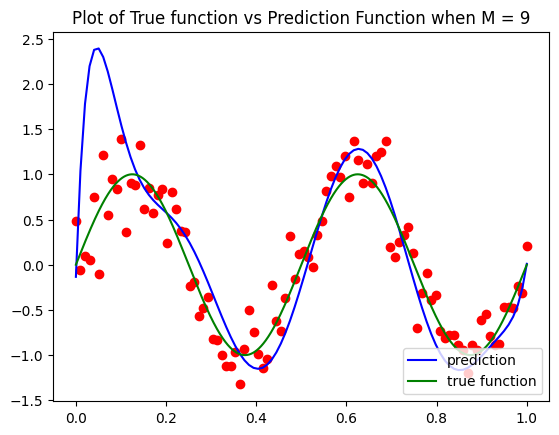

In [9]:
plot_training_validation_prediction()
true_vs_prediction_function_plot(X_train, t_train, polynomial_Train_Pred.iloc[:,i])
true_vs_prediction_function_plot(X_valid, t_valid, polynomial_Valid_Pred.iloc[:,i])

Average Error:  0.01817485562270961


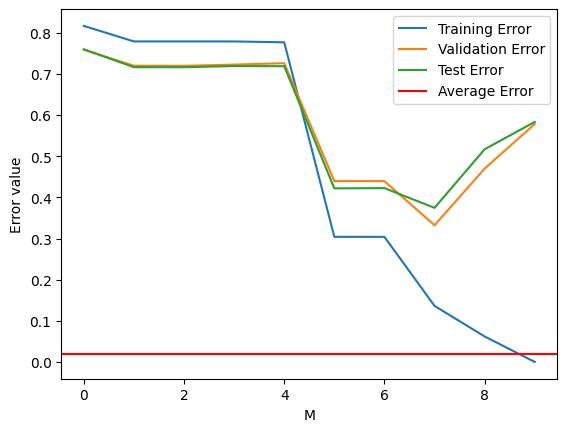

In [10]:
# Computation of average error
def avg_error(t_valid, t_valid_true):
    avg_error=np.subtract(t_valid,t_valid_true)
    return np.average(avg_error)

average_error = avg_error(t_valid, t_valid_true)
print("Average Error: ", average_error)

plt.plot(np.arange(10), error_Train, label = 'Training Error')
plt.plot(np.arange(10), error_Valid, label = 'Validation Error')
plt.plot(np.arange(10), error_Test, label = 'Test Error')
plt.axhline(average_error, color = 'red', label = 'Average Error')
plt.legend()
plt.xlabel("M")
plt.ylabel("Error value")
plt.show()

In [11]:
# Stardardization
N = len(t_train)
M = len(t_valid)

#L2 regularization for M = 9
D = 9
def L2_regularization(X,N,B,t):
    D = (N/2)*B
    E = np.matmul(X.T,X)
    F = D + E
    G = np.linalg.inv(F)
    H = np.matmul(X.T,t)
    W = np.matmul(G,H)
    return np.matmul(X,W)

rmse_train_reg = []
rmse_valid_reg = []
rmse_test_reg = []

RMSE Training Error:  [0.00020657049141407124, 0.5694652814284193, 0.6206135581623762, 0.6460708550387995, 0.6614414580254799, 0.6718814091826096, 0.6795528616445788, 0.6855143526655171, 0.6903429268577683, 0.6943790832872044, 0.6978364109491768]
RMSE Validation Error:  [0.25751135083840987, 0.5223338761783229, 0.5439956026712236, 0.5556511351560522, 0.5637864126170073, 0.5702818884822966, 0.5758541262263189, 0.5808262159417023, 0.5853629592650862, 0.5895575095619936, 0.5934675934064317]
RMSE Test Error:  [0.28881264736188106, 0.5241327597522434, 0.5509312113151199, 0.5646481817100049, 0.573668929475448, 0.5804858117490737, 0.5860732198912986, 0.5908826608408758, 0.5951501468115167, 0.5990112411154838, 0.6025501807491573]


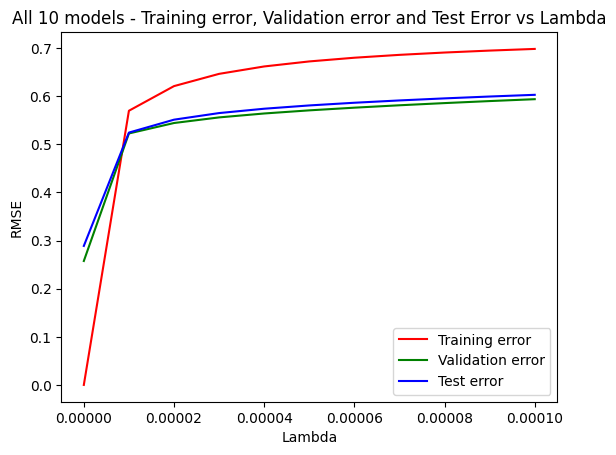

In [12]:
lambda_values = np.arange(0, 0.00011, 0.00001)
for i in lambda_values:
    L=i
    B_matrix=B_matrix=[[]]*10
    B_matrix = np.array(B_matrix)
    for i in range (0, D+1):
        P = [0] * 10
        P[D-i] = 2*L
        P = np.array(P)
        B_matrix = np.insert(B_matrix, 0, P, axis = 1)
    #print(B_matrix)
    Y10_train_reg = L2_regularization(X_train_input, N, B_matrix, t_train)
    RMSE_train_reg = errorComputation(Y10_train_reg, t_train, N)
    rmse_train_reg.append(RMSE_train_reg)
    Y10_valid_reg = L2_regularization(X_valid_input, M, B_matrix, t_valid)
    RMSE_valid_reg = errorComputation(Y10_valid_reg, t_valid, M)
    rmse_valid_reg.append(RMSE_valid_reg)
    Y10_test_reg = L2_regularization(X_test_input, M, B_matrix, t_test)
    RMSE_test_reg = errorComputation(Y10_test_reg, t_test, M)
    rmse_test_reg.append(RMSE_test_reg)

print("RMSE Training Error: ", rmse_train_reg)
print("RMSE Validation Error: ", rmse_valid_reg)
print("RMSE Test Error: ", rmse_test_reg)
rmse_train_reg = np.array(rmse_train_reg)
rmse_valid_reg = np.array(rmse_valid_reg)
rmse_test_reg = np.array(rmse_test_reg)
plt.plot(lambda_values, rmse_train_reg, color = 'red')
plt.plot(lambda_values, rmse_valid_reg, color = 'green')
plt.plot(lambda_values, rmse_test_reg, color = 'blue')
plt.legend(["Training error", "Validation error", "Test error"], loc ="lower right")
plt.title('All 10 models - Training error, Validation error and Test Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.show()

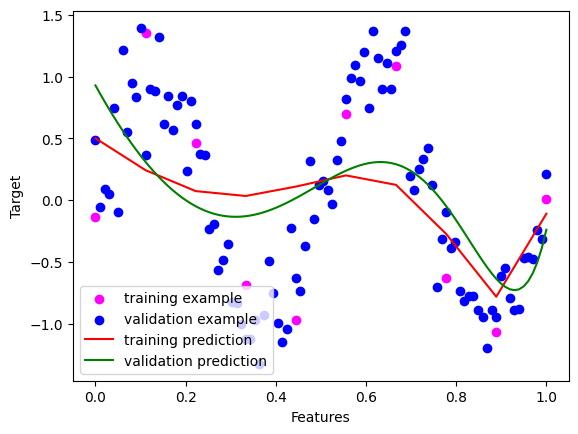

In [13]:
plt.figure()
plt.scatter(X_train, t_train, color = 'magenta', label = 'training example')
plt.scatter(X_valid, t_valid, color = 'blue', label = 'validation example')
plt.plot(X_train, Y10_train_reg, color = 'red', label = 'training prediction')
plt.plot(X_valid, Y10_valid_reg, color = 'green', label = 'validation prediction')
plt.legend()
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

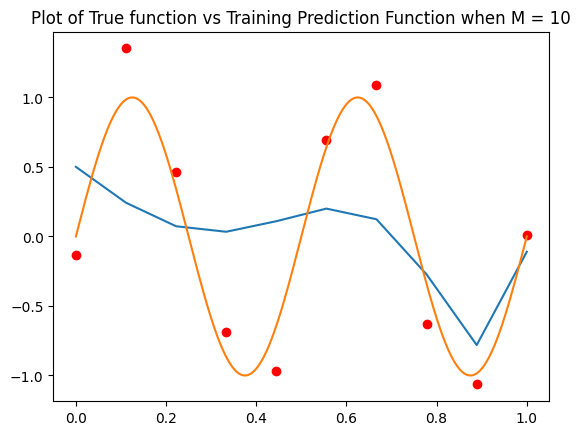

In [14]:
plt.scatter(X_train, t_train,color='red')
plt.plot(X_train, Y10_train_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Training Prediction Function when M = 10')
plt.show()

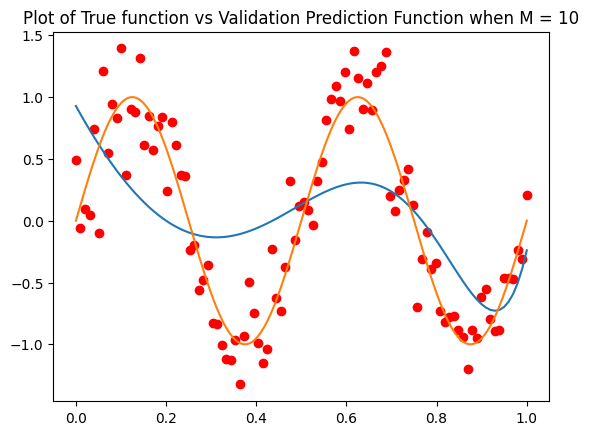

In [15]:
plt.scatter(X_valid, t_valid,color='red')
plt.plot(X_valid, Y10_valid_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Validation Prediction Function when M = 10')
plt.show()

RMSE Training Error:  [0.5694652814284193]
RMSE Validation Error:  [0.5223338761783229]
RMSE Test Error:  [0.5241327597522434]


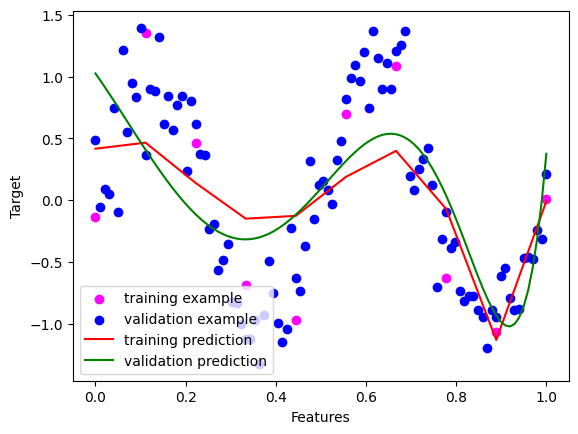

In [16]:
# Based on the RMSE vs lambda values plot lambda1 value is chosen as 0.00001
rmse_train_reg = []
rmse_valid_reg = []
rmse_test_reg = []
L = 0.00001
B_matrix=B_matrix=[[]]*10
B_matrix = np.array(B_matrix)
for i in range (0, D+1):
    P = [0] * 10
    P[D-i] = 2*L
    P = np.array(P)
    B_matrix = np.insert(B_matrix, 0, P, axis = 1)
Y11_train_reg = L2_regularization(X_train_input, N, B_matrix, t_train)
RMSE_train_reg = errorComputation(Y11_train_reg, t_train, N)
rmse_train_reg.append(RMSE_train_reg)
Y11_valid_reg = L2_regularization(X_valid_input, M, B_matrix, t_valid)
RMSE_valid_reg = errorComputation(Y11_valid_reg, t_valid, M)
rmse_valid_reg.append(RMSE_valid_reg)
Y11_test_reg = L2_regularization(X_test_input, M, B_matrix, t_test)
RMSE_test_reg = errorComputation(Y11_test_reg, t_test, M)
rmse_test_reg.append(RMSE_test_reg)

print("RMSE Training Error: ", rmse_train_reg)
print("RMSE Validation Error: ", rmse_valid_reg)
print("RMSE Test Error: ", rmse_test_reg)
error_Train.append(RMSE_train_reg)
error_Valid.append(RMSE_valid_reg)
error_Test.append(RMSE_test_reg)

plt.scatter(X_train, t_train, color = 'magenta', label = 'training example')
plt.scatter(X_valid, t_valid, color = 'blue', label = 'validation example')
plt.plot(X_train, Y11_train_reg, color = 'red', label = 'training prediction')
plt.plot(X_valid, Y11_valid_reg, color = 'green', label = 'validation prediction')

plt.legend()
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

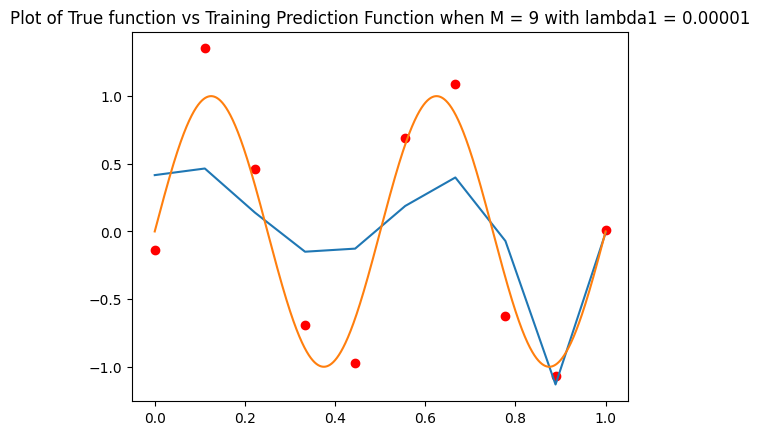

In [17]:
plt.scatter(X_train, t_train, color='red')
plt.plot(X_train, Y11_train_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Training Prediction Function when M = 9 with lambda1 = 0.00001')
plt.show()

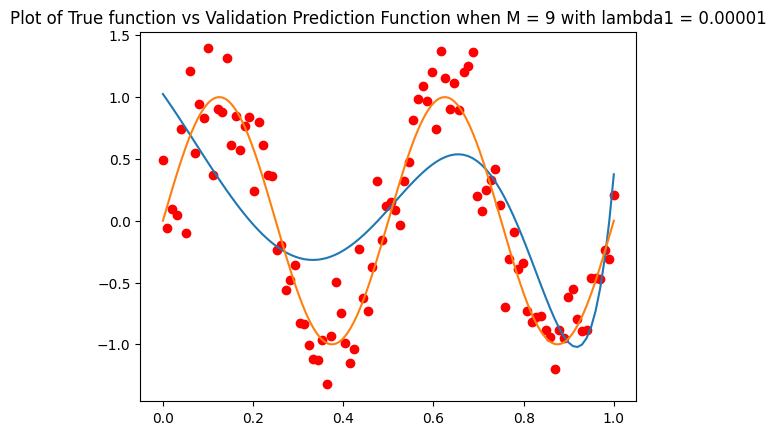

In [18]:
plt.scatter(X_valid, t_valid,color='red')
plt.plot(X_valid, Y11_valid_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Validation Prediction Function when M = 9 with lambda1 = 0.00001')
plt.show()

RMSE Training Error:  [0.6206135581623762]
RMSE Validation Error:  [0.5439956026712236]
RMSE Test Error:  [0.5509312113151199]


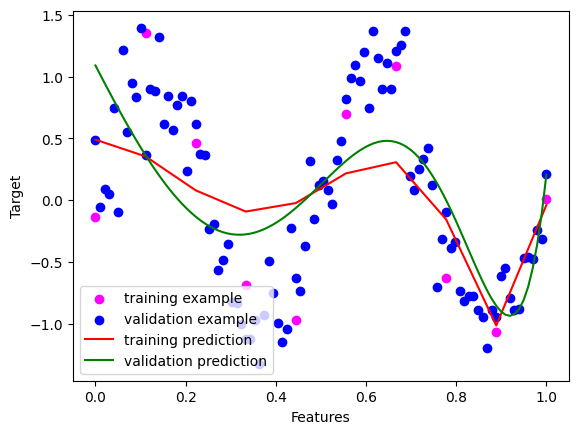

In [19]:
# Based on the RMSE vs lambda values plot lambda1 value is chosen as 0.00002
rmse_train_reg = []
rmse_valid_reg = []
rmse_test_reg = []
L = 0.00002
B_matrix=B_matrix=[[]]*10
B_matrix = np.array(B_matrix)
for i in range (0, D+1):
    P = [0] * 10
    P[D-i] = 2*L
    P = np.array(P)
    B_matrix = np.insert(B_matrix, 0, P, axis = 1)
Y12_train_reg = L2_regularization(X_train_input, N, B_matrix, t_train)
RMSE_train_reg = errorComputation(Y12_train_reg, t_train, N)
rmse_train_reg.append(RMSE_train_reg)
Y12_valid_reg = L2_regularization(X_valid_input, M, B_matrix, t_valid)
RMSE_valid_reg = errorComputation(Y12_valid_reg, t_valid, M)
rmse_valid_reg.append(RMSE_valid_reg)
Y12_test_reg = L2_regularization(X_test_input, M, B_matrix, t_test)
RMSE_test_reg = errorComputation(Y12_test_reg, t_test, M)
rmse_test_reg.append(RMSE_test_reg)

print("RMSE Training Error: ", rmse_train_reg)
print("RMSE Validation Error: ", rmse_valid_reg)
print("RMSE Test Error: ", rmse_test_reg)
rmse_train_reg = np.array(rmse_train_reg)
rmse_valid_reg = np.array(rmse_valid_reg)
rmse_test_reg = np.array(rmse_test_reg)
error_Train.append(RMSE_train_reg)
error_Valid.append(RMSE_valid_reg)
error_Test.append(RMSE_test_reg)

plt.scatter(X_train, t_train, color = 'magenta', label = 'training example')
plt.scatter(X_valid, t_valid, color = 'blue', label = 'validation example')
plt.plot(X_train, Y12_train_reg, color = 'red', label = 'training prediction')
plt.plot(X_valid, Y12_valid_reg, color = 'green', label = 'validation prediction')

plt.legend()
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

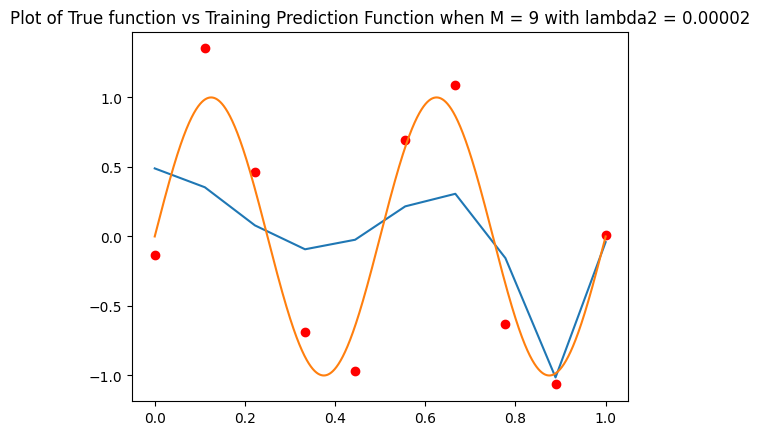

In [20]:
plt.scatter(X_train, t_train, color='red')
plt.plot(X_train, Y12_train_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Training Prediction Function when M = 9 with lambda2 = 0.00002')
plt.show()

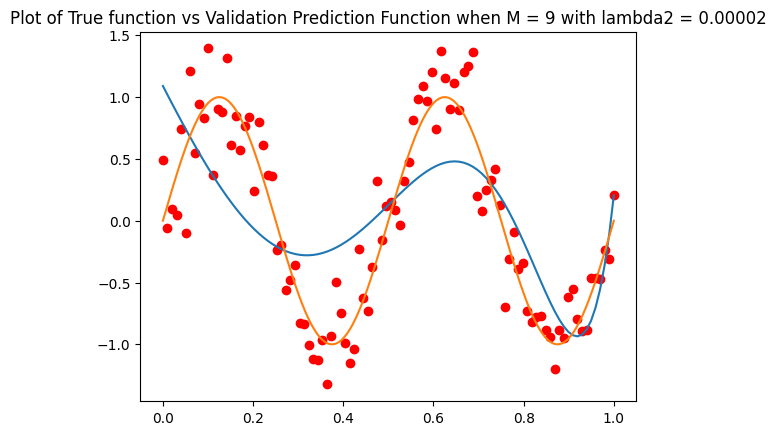

In [21]:
plt.scatter(X_valid, t_valid,color='red')
plt.plot(X_valid, Y12_valid_reg)
plt.plot(X_true, t_true)
plt.title('Plot of True function vs Validation Prediction Function when M = 9 with lambda2 = 0.00002')
plt.show()

Average Error:  0.01817485562270961
RMSE Training Error:  [0.816660969976422, 0.7789838978378575, 0.7789794000899992, 0.7789105551997759, 0.7768590465729194, 0.304112445081133, 0.3040333818482205, 0.1362952311378876, 0.061939191939998785, 8.625992773116995e-05, 0.5694652814284193, 0.6206135581623762]
RMSE Validation Error:  [0.7587903008757801, 0.7197359258044828, 0.7196777311926025, 0.7226494227383822, 0.7260987829422623, 0.43961854158680325, 0.4394976586569084, 0.33219640809391293, 0.46989261386119685, 0.5782307067796147, 0.5223338761783229, 0.5439956026712236]
RMSE Test Error:  [0.7598641762863054, 0.7164044475256184, 0.7162932081740518, 0.7191455257974311, 0.7187898120184213, 0.4219012157608195, 0.42242537688900794, 0.37461256490523953, 0.5169011973913942, 0.5833714081324628, 0.5241327597522434, 0.5509312113151199]


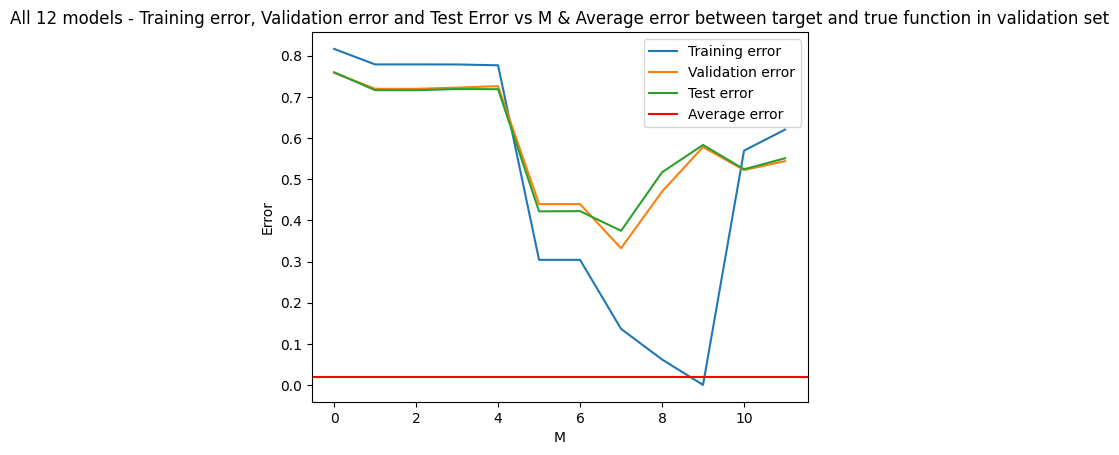

In [22]:
plt.plot(np.arange(12), error_Train)
plt.plot(np.arange(12), error_Valid)
plt.plot(np.arange(12), error_Test)
average_error = avg_error(t_valid, t_valid_true)
print("Average Error: ", average_error)
print("RMSE Training Error: ", error_Train)
print("RMSE Validation Error: ", error_Valid)
print("RMSE Test Error: ", error_Test)
plt.axhline(y = average_error, color='red')
plt.title("All 12 models - Training error, Validation error and Test Error vs M & Average error between target and true function in validation set")
plt.xlabel('M')
plt.ylabel('Error')
plt.legend(["Training error", "Validation error", "Test error","Average error"], loc ="upper right")
plt.show()

In [23]:
#From the above plots and Error versus M plot we observe the test set and its error. We can conclude that M = 9 with Lambda 1 = 0.000001 model
#i.e. the 11th model, is the best model as it has minimal error with no overfitting or underfitting issues.